<a href="https://colab.research.google.com/github/GGoYoungHee/RGBrand/blob/main/Logo_color_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/보아즈/시각화코드_adv/itaone_96.csv',encoding='cp949')
data.head()

,names,url,R,G,B,text color,로고 유형,비고
0,Colgate,https://www.interbrand.com/assets/00000001501.png,235,26,34,무채색,5,NaN
1,Compaq,https://www.interbrand.com/assets/00000000046.png,231,33,47,매치,1,NaN
2,Corona,https://www.interbrand.com/assets/00000001502.png,0,87,137,매치하지않음,4,다색
3,Coway,https://www.interbrand.com/assets/00000001685.png,6,167,226,매치,1,NaN
4,Credit Suisse,https://www.interbrand.com/assets/00000000048.png,0,53,95,매치,4,그라데이션


In [ ]:
#data['color1']=np.nan
#data['color2']=np.nan
#data['color3']=np.nan
#data['color4']=np.nan
#data['color5']=np.nan
del data['color1']
del data['color2']
del data['color3']
del data['color4']
del data['color5']

In [ ]:
data.head()

,names,url,R,G,B,text color,로고 유형,비고
0,Colgate,https://www.interbrand.com/assets/00000001501.png,235,26,34,무채색,5,NaN
1,Compaq,https://www.interbrand.com/assets/00000000046.png,231,33,47,매치,1,NaN
2,Corona,https://www.interbrand.com/assets/00000001502.png,0,87,137,매치하지않음,4,다색
3,Coway,https://www.interbrand.com/assets/00000001685.png,6,167,226,매치,1,NaN
4,Credit Suisse,https://www.interbrand.com/assets/00000000048.png,0,53,95,매치,4,그라데이션


In [ ]:
data['url'][9]

'https://www.interbrand.com/assets/00000001504.png'

In [ ]:
image = cv2.imread('/content/drive/My Drive/Colab Notebooks/보아즈/시각화코드_adv/인터브랜드 로고/9.png')

In [ ]:
#/content/drive/My Drive/컬러 마케팅/2. 데이터/itatwo_pic

In [ ]:
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt

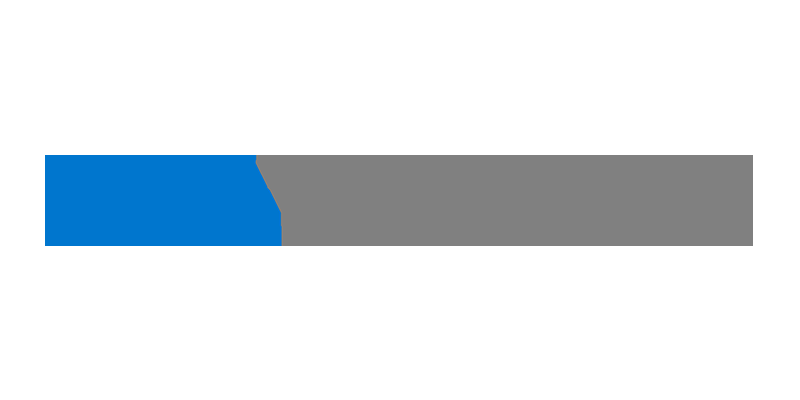

In [ ]:
cv2_imshow(image)

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
image = image.reshape((image.shape[0] * image.shape[1], 3)) # height, width 통합
print(image.shape)

(320000, 3)


In [ ]:
k = 3 # k=로고 색 개수+1
clt = KMeans(n_clusters = k)
clt.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
for center in clt.cluster_centers_:
    print(center)

#[254.96637654 254.59229446 254.60677321]
#[236.02081207  27.31221476  35.24398121]

[255. 255. 255.]
[128.01969295 128.00153066 127.98796034]
[1.08975600e-01 1.18001888e+02 2.05987558e+02]


In [ ]:
clt.cluster_centers_[-1][-1]

205.98755809450685

In [ ]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist


hist = centroid_histogram(clt)
#hist1=hist[1:]
print(hist)

[0.7986625 0.1367875 0.06455  ]


In [ ]:
print(hist)

[0.7986625 0.1367875 0.06455  ]


In [ ]:
for i,j in enumerate(hist):
  print('인덱스',i)
  print('값',j)

인덱스 0
값 0.7986625
인덱스 1
값 0.1367875
인덱스 2
값 0.06455


In [ ]:
#per=hist1[0]+hist1[1]+hist1[2]+hist1[3]
#per

In [ ]:
#hist2=hist1/per
#hist2

array([0.07512521, 0.29908822, 0.47553615, 0.15025042])

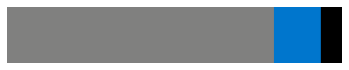

In [ ]:
'''
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

bar = plot_colors(hist, clt.cluster_centers_[1:])


# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()
'''

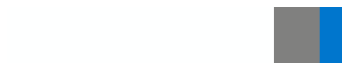

In [ ]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

bar = plot_colors(hist, clt.cluster_centers_)


# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [ ]:
clt.cluster_centers_

array([[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
       [1.28019693e+02, 1.28001531e+02, 1.27987960e+02],
       [1.08975600e-01, 1.18001888e+02, 2.05987558e+02]])

In [ ]:
clt.cluster_centers_[1][0]

128.01969295432235

In [ ]:
data.head()

,names,url,R,G,B,text color,로고 유형,비고
0,Colgate,https://www.interbrand.com/assets/00000001501.png,235,26,34,무채색,5,NaN
1,Compaq,https://www.interbrand.com/assets/00000000046.png,231,33,47,매치,1,NaN
2,Corona,https://www.interbrand.com/assets/00000001502.png,0,87,137,매치하지않음,4,다색
3,Coway,https://www.interbrand.com/assets/00000001685.png,6,167,226,매치,1,NaN
4,Credit Suisse,https://www.interbrand.com/assets/00000000048.png,0,53,95,매치,4,그라데이션


In [ ]:
R=[1,2,3,10,11]
G=[4,5,6,30,52]
B=[7,8,9,3,55]

color=[]

for i in range(5):
  tmp=dict(R[i])

IndexError: ignored

ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [ ]:
R=[1,2,3,10,11]
G=[4,5,6,30,52]
B=[7,8,9,3,55]

R[0]

1

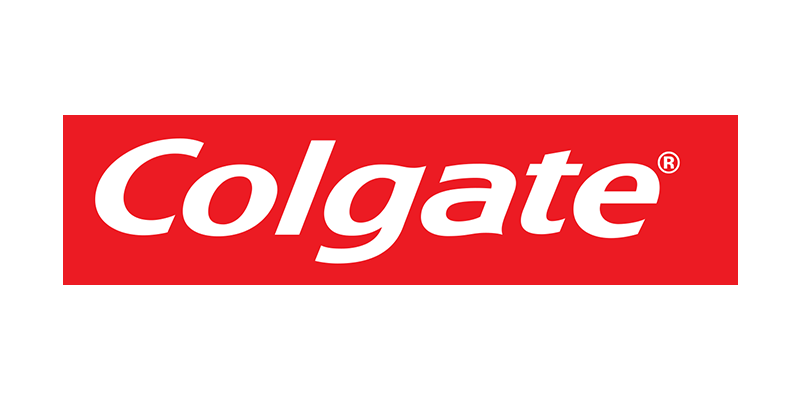

로고 색 개수+1: 2
[236.02081207  27.31221476  35.24398121]
[254.96637654 254.59229446 254.60677321]
버려야할 RGB순서, 배경색: 1
[236.02081207458042]
[27.312214758763048]
[35.24398120623616]


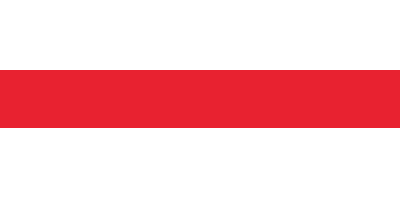

로고 색 개수+1: 2
[232.  34.  48.]
[255. 255. 255.]
버려야할 RGB순서, 배경색: 1
[231.9999999999989]
[33.99999999995791]
[47.99999999993608]


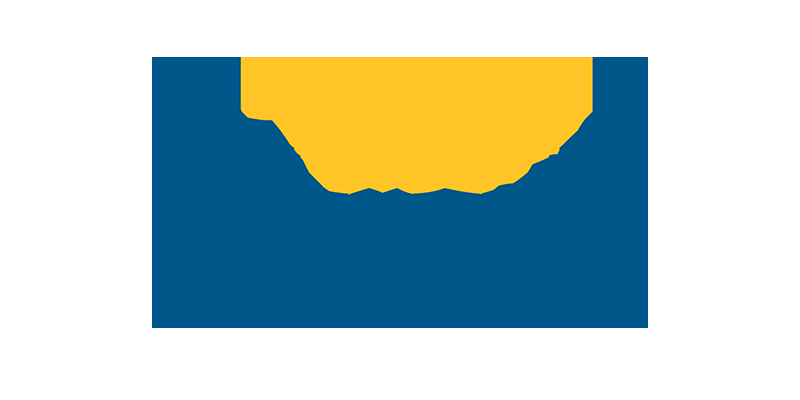

로고 색 개수+1: 3
[255. 255. 255.]
[  0.18923373  86.98557032 137.0137008 ]
[254.55295597 196.03242767  36.97122013]


KeyboardInterrupt: ignored

In [ ]:
for i in range(10):
  name=data['names'][i]
  #print(name)
  image = cv2.imread('/content/drive/My Drive/컬러 마케팅/2. 데이터/itatwo_pic/'+str(48+i)+'.'+str(name)+'.png')
  cv2_imshow(image)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = image.reshape((image.shape[0] * image.shape[1], 3))
  k = int(input('로고 색 개수+1: ')) # k=로고 색 개수+1
  clt = KMeans(n_clusters = k)
  clt.fit(image)
  
  for center in clt.cluster_centers_:
    print(center)
  tmp=int(input('버려야할 RGB순서, 배경색: '))
  hist = centroid_histogram(clt)
  #print(hist)
  for i,j in enumerate(hist):
    if i==tmp:
      pass
    else:
      R=[]
      G=[]
      B=[]
      for _ in range(k-1):
        R.append(clt.cluster_centers_[i][0])
        G.append(clt.cluster_centers_[i][1])
        B.append(clt.cluster_centers_[i][2])
      #print('인덱스 값: ',i)
      #print('퍼센트 값: ',j)
  
  for num,value in enumerate(R):
    data['color']

  